In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [6]:
df = pd.read_csv("USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


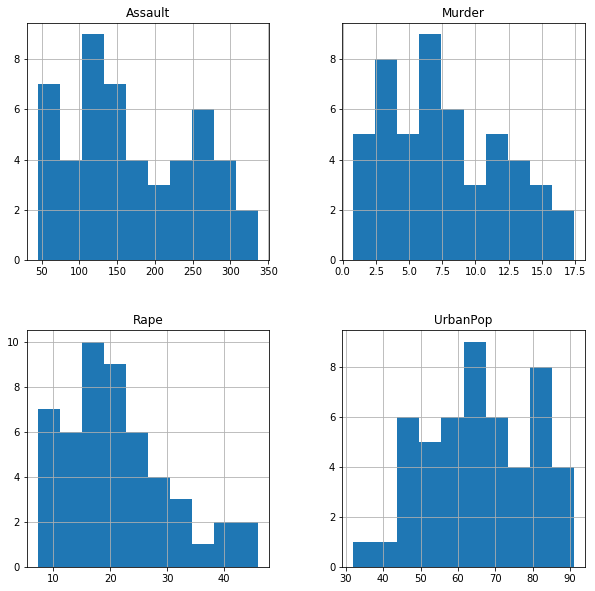

In [12]:
df.hist(figsize = (10,10));

In [14]:
kmeans = KMeans(n_clusters = 4)

In [15]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
k_fit = kmeans.fit(df)

In [17]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [18]:
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0])

### Visualization of Clusters

In [19]:
k_means = KMeans(n_clusters = 2).fit(df)

In [20]:
clusters = k_means.labels_

In [21]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

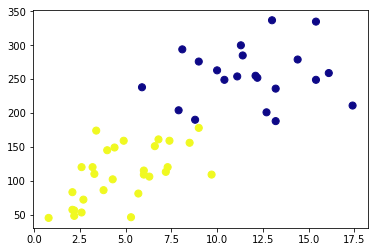

In [25]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = clusters, s = 50, cmap = "plasma");

In [26]:
centers = k_means.cluster_centers_

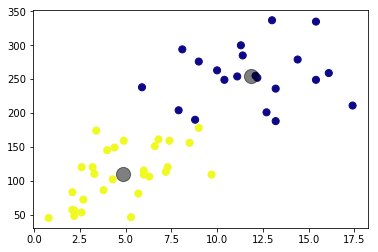

In [27]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = clusters, s = 50, cmap = "plasma");
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5);

In [49]:
# PCA

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']

In [30]:
# Separating out the features
x = df.loc[:, features].values

In [32]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_components = pd.DataFrame(principalComponents)

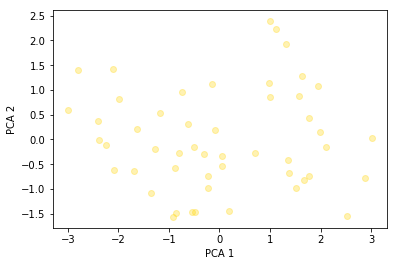

In [36]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

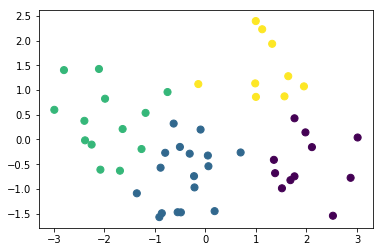

In [39]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:3])

labels = model.predict(PCA_components.iloc[:,:3])
plt.scatter(PCA_components[0], PCA_components[1], c=labels, s = 50)
plt.show()

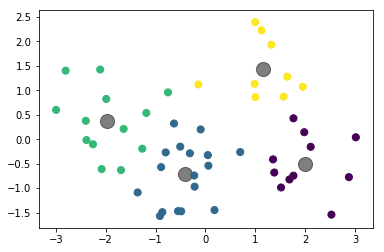

In [47]:
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],  c = "black", s = 200, alpha = 0.5);

labels = model.predict(PCA_components.iloc[:,:3])
plt.scatter(PCA_components[0], PCA_components[1], c=labels, s = 50)
plt.show()